In [1]:
import joblib
import pickle
import numpy as np
from utils.models import Classification
from utils.model_evaluation import performance_evaluate

In [2]:
# Read Feature File
file = "feature_set_real1"
filename = f"/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/data/feature_set/{file}.pickle"
with open(f'{filename}', 'rb') as handle:
    dataset = pickle.load(handle)

In [3]:
display(dataset.keys())

dict_keys(['mean_input', 'median_input', 'mode_input', 'POS_IDX', 'y_label'])

In [4]:
classifier = Classification()

## Decision Tree

In [13]:
params = {
    "max_depth": np.arange(2,5,1), # 
    "min_samples_split": np.arange(2,6,2)
}

In [21]:
x_train, y_train = dataset["mean_input"].to_numpy(), dataset["y_label"].to_numpy(),

tuner, best_params, feature_importance, tuner_results = classifier.hyperparameter_tuning(
    df_tuple=(x_train, y_train),
    score_metric="f1",
    kfold_type="repeatedKfold",
    n_splits=4,
    params=params,
    model_name="decision_tree"
)

# Save file
model_name = "real1_mean_impute_dt"
save_path = f"/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/model_assets/{model_name}.joblib"
joblib.dump(tuner.best_estimator_, save_path)

Model Tuning Starttime :: 2024-02-19 22:31:00.261258
Model Tuning Completed :: 2024-02-19 22:31:01.081729


 Macro Precision :  0.95, Recall :  0.93, F1 :  0.94
 Micro Precision :  0.99, Recall :  0.99, F1 :  0.99
 binary Precision :  0.90, Recall :  0.86, F1 :  0.88


((0.9495593943063271, 0.9289805729201202, 0.9390143926080277),
 (0.9938012762078395, 0.9938012762078395, 0.9938012762078395),
 (0.9029435163086714, 0.8605003790750568, 0.8812111801242236))

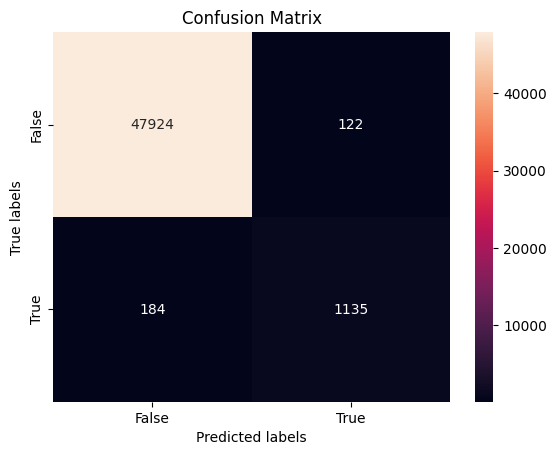

In [23]:
performance_evaluate(
    data_set=(x_train, y_train),
    model_name = model_name,
    filepath = "/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/model_assets"
)


## Random Forest

In [24]:
params = {
    "max_depth": np.arange(2,5,1), # 
    "min_samples_split": np.arange(2,6,2),
    "min_samples_leaf": np.arange(4,10,2)
}

In [25]:
x_train, y_train = dataset["mean_input"].to_numpy(), dataset["y_label"].to_numpy(),

tuner, best_params, feature_importance, tuner_results = classifier.hyperparameter_tuning(
    df_tuple=(x_train, y_train),
    score_metric="f1",
    kfold_type="repeatedKfold",
    n_splits=4,
    params=params,
    model_name="random_forest"
)

# Save file
model_name = "real1_mean_impute_rf"
save_path = f"/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/model_assets/{model_name}.joblib"
joblib.dump(tuner.best_estimator_, save_path)

Model Tuning Starttime :: 2024-02-19 22:34:22.462063


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.

Model Tuning Completed :: 2024-02-19 22:34:42.923258


['/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/model_assets/real1_mean_impute_rf.joblib']

 Macro Precision :  0.97, Recall :  0.90, F1 :  0.93
 Micro Precision :  0.99, Recall :  0.99, F1 :  0.99
 binary Precision :  0.94, Recall :  0.81, F1 :  0.87


((0.9679550116279247, 0.9049130623713306, 0.934026603223062),
 (0.9935987035348931, 0.9935987035348931, 0.9935987035348931),
 (0.9410729991204925, 0.8112206216830933, 0.8713355048859935))

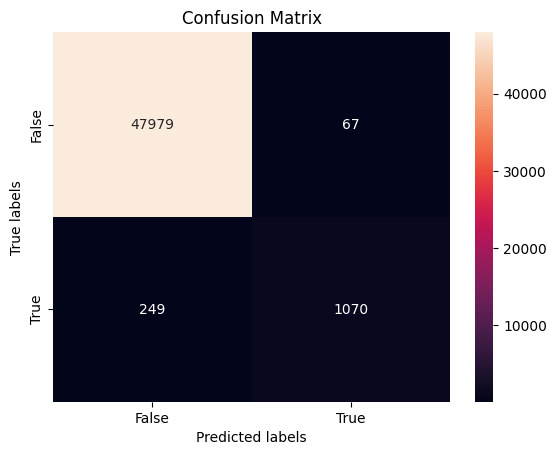

In [26]:
performance_evaluate(
    data_set=(x_train, y_train),
    model_name = model_name,
    filepath = "/Users/melloo21/Desktop/NUS Items/CS4220/cs4220_projects/model_assets"
)
